In [1]:
# analyze the data update record for API Server schedule optimization

# imports

import pandas as pd
import sys

# set up file paths and other data globals

import config
import modify

# local imports
from covid_package.data_funcs.store_data import read_json_data
from covid_package.data_funcs.datetime_funcs import convert_datetime_str_to_obj
from covid_package.plots.plot_results import scatter_plot

print("Imports complete")

Imports complete


In [2]:
# read the update_record.json file
updata = read_json_data(config.UPDATE_FILE_STR)

# get the update datetime list
update_list = updata['update_list']

# organize the pandas column data
update_dict = {
    'datetime_strings': update_list,
    'day_nums': [convert_datetime_str_to_obj(i, 'day_num') for i in update_list], 
    'days': [convert_datetime_str_to_obj(i, 'day') for i in update_list], 
    'hours': list(map(int, [convert_datetime_str_to_obj(i, 'hour') for i in update_list])), 
    'minutes': list(map(int, [convert_datetime_str_to_obj(i, 'minute') for i in update_list]))
    }

# create the dataframe
df = pd.DataFrame(update_dict)
df


,datetime_strings,day_nums,days,hours,minutes
0,2021-04-01T14:40:33Z,4,Thursday,14,40
1,2021-04-03T09:02:46Z,6,Saturday,9,2
2,2021-04-04T08:02:44Z,7,Sunday,8,2
3,2021-04-05T13:02:56Z,1,Monday,13,2
4,2021-04-06T18:02:52Z,2,Tuesday,18,2
...,...,...,...,...,...
231,2021-10-30T10:06:16Z,6,Saturday,10,6
232,2021-10-31T09:49:35Z,7,Sunday,9,49
233,2021-11-01T11:22:22Z,1,Monday,11,22
234,2021-11-02T12:55:33Z,2,Tuesday,12,55


In [3]:
# boil down the data for analysis by day of the week and hours of the day
hc = df.groupby(['day_nums', 'days', 'hours']).size().reset_index(name='counts')
hc

,day_nums,days,hours,counts
0,1,Monday,5,11
1,1,Monday,7,1
2,1,Monday,11,1
3,1,Monday,12,2
4,1,Monday,13,6
...,...,...,...,...
82,7,Sunday,13,1
83,7,Sunday,14,2
84,7,Sunday,16,2
85,7,Sunday,17,1


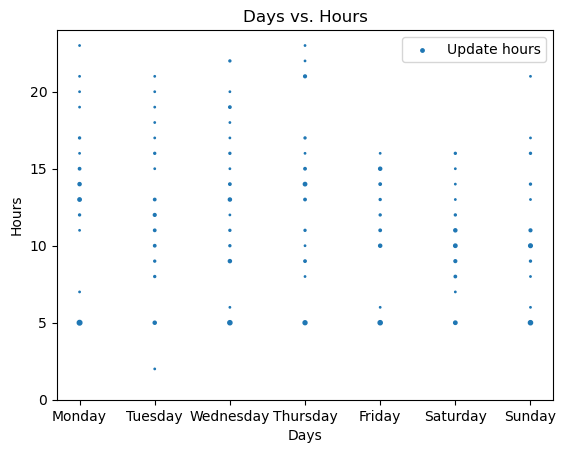

In [4]:

labels = {
    'title': 'Days vs. Hours',
    'x_label': 'Days',
    'y_label': 'Hours'
}

results = {
    'x_axis': hc['days'],
    'y_axis': hc['hours'],
    'legend_label': 'Update hours'
}

params = {
    'y_lim': (0, 24),
    'area': hc['counts'],
    'colors': None,
    'alpha': None
}

scatter_plot(labels, results, params)

In [5]:
# boil down the data for analysis by day of the week and hours of the day
mc = df.groupby(['hours', 'minutes']).size().reset_index(name='counts')
mc

,hours,minutes,counts
0,2,3,1
1,5,2,47
2,5,3,10
3,6,2,1
4,6,3,1
...,...,...,...
133,21,33,1
134,22,3,1
135,22,19,1
136,22,24,1


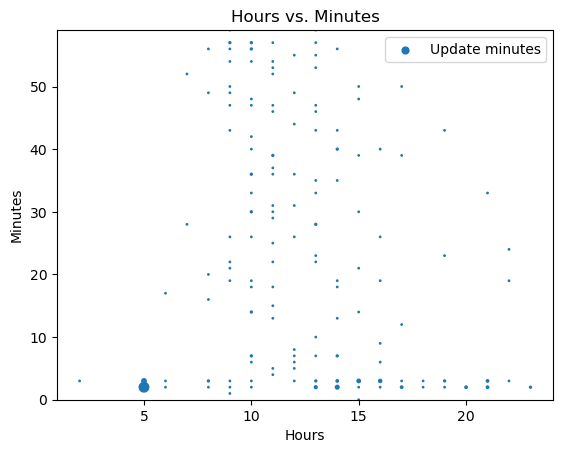

In [6]:
labels = {
    'title': 'Hours vs. Minutes',
    'x_label': 'Hours',
    'y_label': 'Minutes'
}

results = {
    'x_axis': mc['hours'],
    'y_axis': mc['minutes'],
    'legend_label': 'Update minutes'
}

params = {
    'y_lim': (0, 59),
    'area': mc['counts'],
    'colors': None,
    'alpha': None
}

scatter_plot(labels, results, params)